In [ ]:
#data is collected from github
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
df=pd.read_csv('https://raw.githubusercontent.com/arib168/data/main/50_Startups.csv')


In [ ]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [ ]:
df.tail()

,R&D Spend,Administration,Marketing Spend,State,Profit
45,1000.23,124153.04,1903.93,New York,64926.08
46,1315.46,115816.21,297114.46,Florida,49490.75
47,0.00,135426.92,0.00,California,42559.73
48,542.05,51743.15,0.00,New York,35673.41
49,0.00,116983.80,45173.06,California,14681.40


In [ ]:
df.shape

(50, 5)

In [ ]:
df.columns

Index(['R&D Spend', 'Administration', 'Marketing Spend', 'State', 'Profit'], dtype='object')

In [ ]:
df.isna().sum()

R&D Spend          0
Administration     0
Marketing Spend    0
State              0
Profit             0
dtype: int64

In [ ]:
df.dtypes

R&D Spend          float64
Administration     float64
Marketing Spend    float64
State               object
Profit             float64
dtype: object

In [ ]:
#regression plot cannot be drawn with object columns
df['State'].unique()

array(['New York', 'California', 'Florida'], dtype=object)

In [ ]:
df['State'].value_counts()

State
New York      17
California    17
Florida       16
Name: count, dtype: int64

([<matplotlib.patches.Wedge at 0x7f73fc1d33d0>,
 [Text(0.5299290306818474, 0.9639373540021144, 'New York'),
  Text(-1.0978293989430645, -0.069069608485279, 'California'),
  Text(0.5894094953465407, -0.9287607048079373, 'Florida')],
 [Text(0.28905219855373493, 0.5257840112738805, '34.0%'),
  Text(-0.598816035787126, -0.037674331901061266, '34.0%'),
  Text(0.32149608837084037, -0.5065967480770566, '32.0%')])

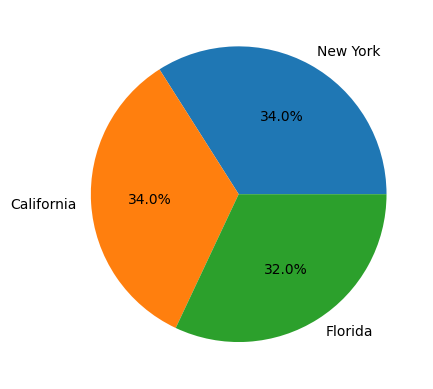

In [ ]:
x=[17,17,16]
data=['New York','California','Florida']
plt.pie(x,labels=data,autopct='%1.1f%%')

In [ ]:
x=df.iloc[:,:-1]
y=df.iloc[:,-1]

<Axes: xlabel='R&D Spend', ylabel='Profit'>

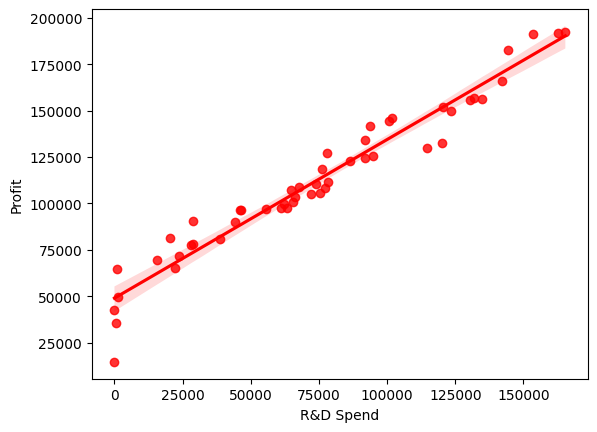

In [ ]:
sns.regplot(x=df['R&D Spend'],y=y,color='red')

<Axes: xlabel='Administration', ylabel='Profit'>

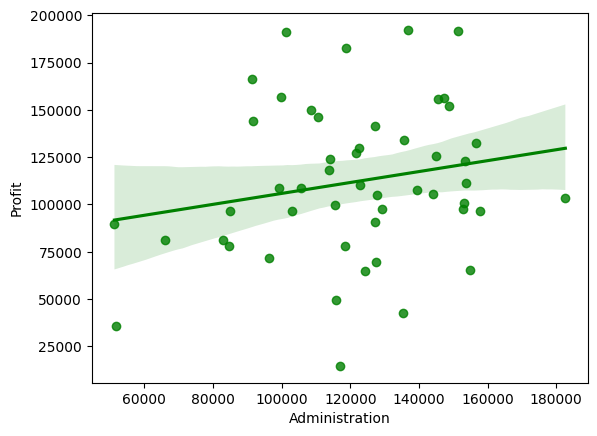

In [ ]:
sns.regplot(x=df['Administration'],y=y,color='green')

<Axes: xlabel='Marketing Spend', ylabel='Profit'>

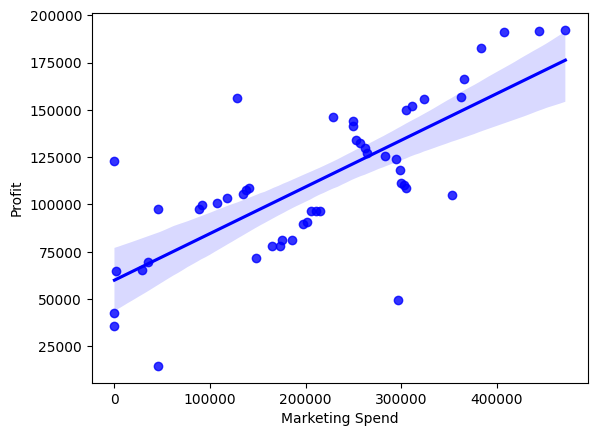

In [ ]:
sns.regplot(x=df['Marketing Spend'],y=y,color='blue')

In [ ]:
#encoding
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder
one=make_column_transformer((OneHotEncoder(handle_unknown='ignore'),['State']),remainder='passthrough')
x=one.fit_transform(x)


In [ ]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.30,random_state=42)


In [ ]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(x_train,y_train)
y_pred=model.predict(x_test)
y_pred

array([126187.39411505,  85788.82259512,  99777.02815178,  45706.12238329,
       127062.20722772,  51891.83884459, 109114.62977495, 100600.61123702,
        97953.99874716, 111730.5770681 , 128818.49200668, 174195.35772631,
        93736.28538438, 148381.0409716 , 172313.87139388])

In [ ]:
data={'actual':y_test,'predicted':y_pred,'difference':y_test-y_pred}
df1=pd.DataFrame(data)
df1

,actual,predicted,difference
13,134307.35,126187.394115,8119.955885
39,81005.76,85788.822595,-4783.062595
30,99937.59,99777.028152,160.561848
45,64926.08,45706.122383,19219.957617
17,125370.37,127062.207228,-1691.837228
48,35673.41,51891.838845,-16218.428845
26,105733.54,109114.629775,-3381.089775
25,107404.34,100600.611237,6803.728763
32,97427.84,97953.998747,-526.158747
19,122776.86,111730.577068,11046.282932


In [ ]:
model.predict([[1.78, 0.5672, 7.123, 7.8013,
        1, 2.6]])

array([51074.72282269])

In [ ]:
print("Slopes are : ",model.coef_)

Slopes are :  [ 2.59028652e+02  7.17099427e+02 -9.76128080e+02  8.04937292e-01
 -9.12577104e-02  2.80672826e-02]


In [ ]:
print("Constant is : ",model.intercept_)

Constant is :  57153.612062430875


In [ ]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,r2_score
print("MAPE : ",mean_absolute_percentage_error(y_test,y_pred))

MAPE :  0.08929865344172414


In [ ]:
print("r2_score : ",r2_score(y_test,y_pred))

r2_score :  0.9397108063356046


In [ ]:
print("MAE : ",mean_absolute_error(y_test,y_pred))

MAE :  7395.433531521974


In [ ]:
print("MSE : ",mean_squared_error(y_test,y_pred))

MSE :  84826955.03529756


In [ ]:
MSE=mean_squared_error(y_test,y_pred)
print("RMSE : ",np.sqrt(MSE))

RMSE :  9210.154995183173
